In [3]:
import cv2
import matplotlib.pyplot as plt

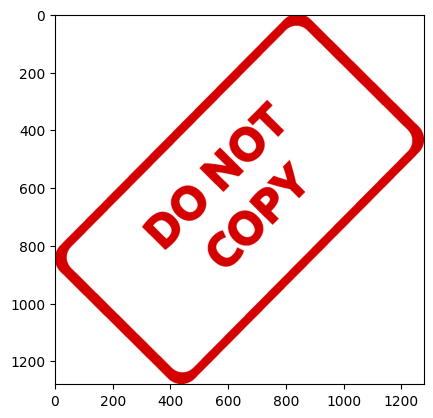

In [12]:
img1 = cv2.imread('dog_backpack.jpg')
rgb_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('watermark_no_copy.png')
rgb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img2)

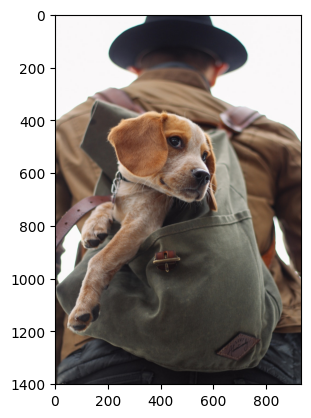

In [20]:
plt.imshow(rgb_img1)

In [13]:
rgb_img1.shape

(1401, 934, 3)

In [14]:
rgb_img2.shape

(1280, 1277, 3)

In [15]:
rgb_img1.ndim

3

In [16]:
rgb_img2.ndim

3

In [17]:
rgb_img1.size

3925602

In [18]:
rgb_img2.size

4903680

In [19]:
1280*1277*3

4903680

In [21]:
img1_resize = cv2.resize(rgb_img1, dsize = (1000,1200))
img2_resize = cv2.resize(rgb_img2, dsize = (1000,1200))

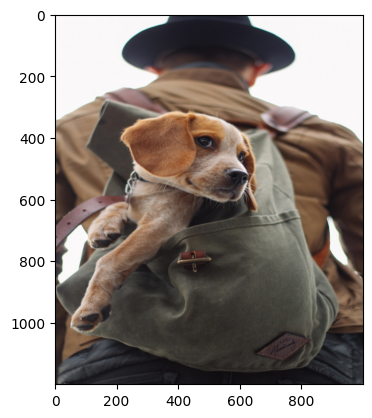

In [22]:
plt.imshow(img1_resize)

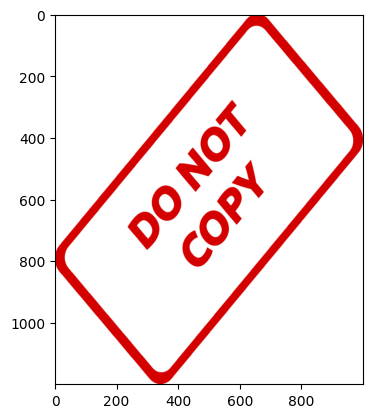

In [23]:
plt.imshow(img2_resize)

In [24]:
img1_resize.shape

(1200, 1000, 3)

In [25]:
img2_resize.shape

(1200, 1000, 3)

In [35]:
blended = cv2.addWeighted(src1 = img1_resize, alpha=1, src2 = img2_resize, beta=0.2, gamma=0)

In [29]:
blended.shape

(1200, 1000, 3)

In [30]:
blended.max()

255

In [31]:
blended.min()

4

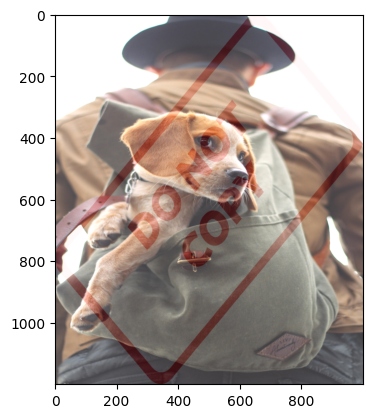

In [36]:
plt.imshow(blended)

In [40]:
## Overlaying/pasting a small image on top of the larger image
## no blending
## Numpy reassign operation

In [51]:
img2_reduced = cv2.resize(rgb_img2,dsize=(400,400))

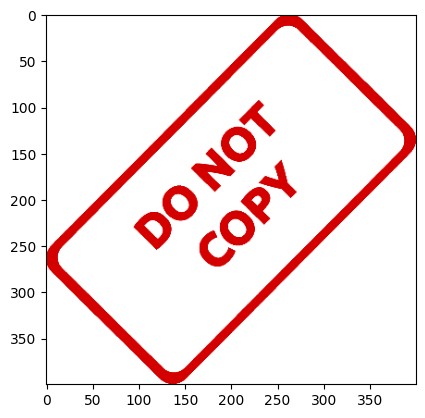

In [52]:
plt.imshow(img2_reduced)

In [53]:
large_image = rgb_img1
small_image = img2_reduced

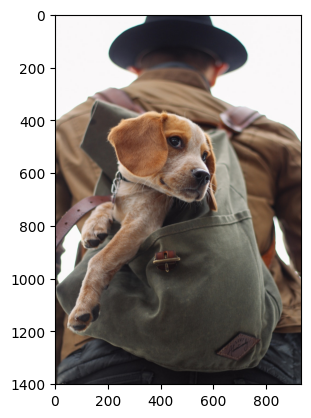

In [54]:
plt.imshow(large_image)

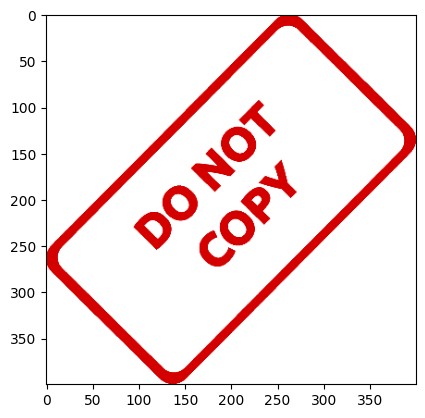

In [57]:
plt.imshow(small_image)

In [56]:
## let's take a chunk from the big image & replace the small image in that chunk

In [59]:
x_offset = 0
y_offset = 0

x_end = x_offset + small_image.shape[1]
y_end = y_offset + small_image.shape[0]

In [58]:
small_image.shape

(400, 400, 3)

In [61]:
small_image.shape

(400, 400, 3)

In [62]:
large_image[y_offset:y_end,x_offset:x_end].shape

(400, 400, 3)

In [63]:
large_image[y_offset:y_end,x_offset:x_end] = small_image

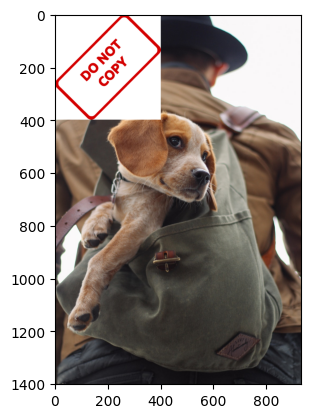

In [64]:
plt.imshow(large_image)

In [67]:
plt.imsave('blended_image.jpg', blended)
plt.imsave('overlapping_image.jpg', large_image)

In [39]:
## How you can blend together images of different sizes
## blending the images together
## Can't use addweighted because addweighted looks for the images for the same size

In [77]:
image1 = cv2.imread('dog_backpack.jpg')
image2 = cv2.imread('watermark_no_copy.png')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image2 = cv2.resize(image2, dsize=(500,500))

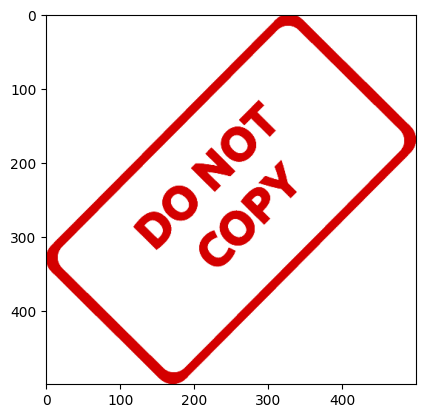

In [78]:
plt.imshow(image2)

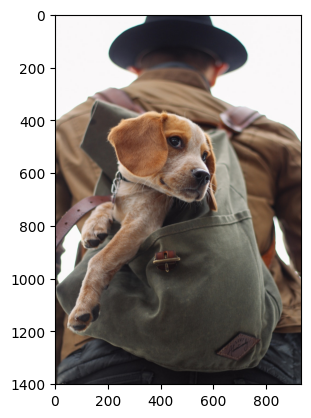

In [79]:
plt.imshow(image1)

In [80]:
image1.shape

(1401, 934, 3)

In [81]:
image2.shape

(500, 500, 3)

In [83]:
## Finding the ROI - Region of Interest from the Target Image

In [84]:
x_offset = 934-500
y_offset = 1401-500

x_end = image1.shape[1]
y_end = image1.shape[0]

In [85]:
image1_roi = image1[y_offset:y_end,x_offset:x_end]

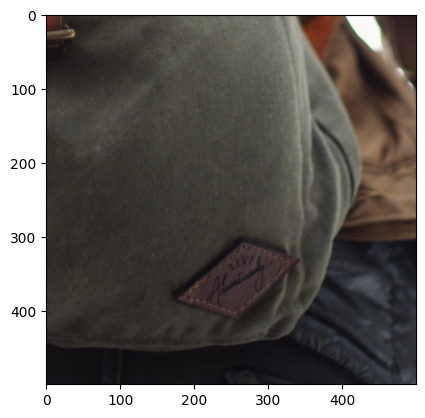

In [86]:
plt.imshow(image1_roi)

In [ ]:
### Masking the watermark image

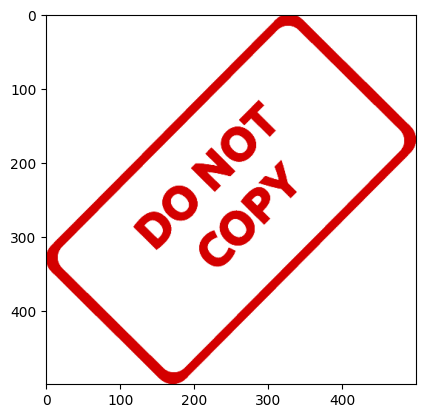

In [87]:
plt.imshow(image2)

In [93]:
# cv2.imread(image2)

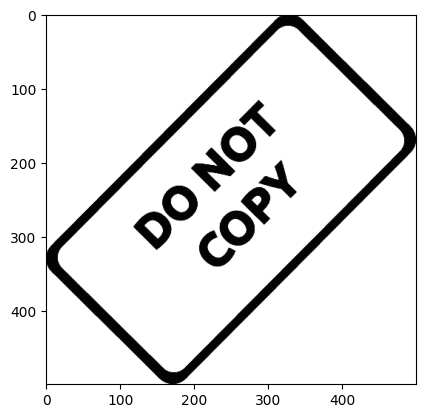

In [94]:
image2_gray = cv2.cvtColor(image2, code = cv2.COLOR_RGB2GRAY)
plt.imshow(image2_gray, cmap='gray')

In [101]:
mask_inv = cv2.bitwise_not(image2_gray)

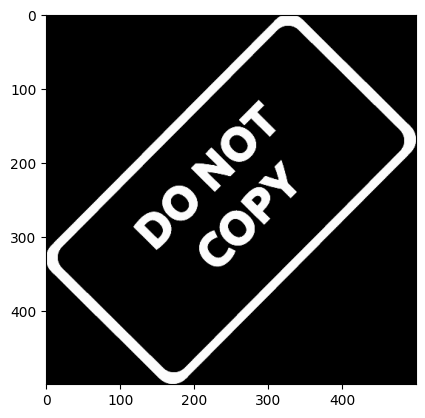

In [104]:
plt.imshow(mask_inv, cmap='gray')

In [105]:
mask_inv.shape

(500, 500)

In [106]:
image2_gray.shape

(500, 500)

In [107]:
image2.shape

(500, 500, 3)

In [108]:
fg = cv2.bitwise_or(image2, image2, mask=mask_inv)

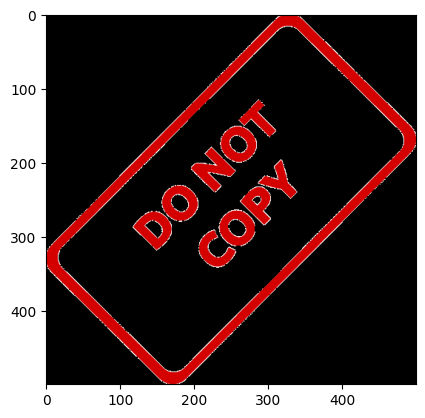

In [109]:
plt.imshow(fg)

In [110]:
fg.max()

255

In [111]:
fg.min()

0

In [112]:
fg.mean()

12.092116

In [118]:
fg.shape

(500, 500, 3)

In [116]:
###Combining the masked image with the target image

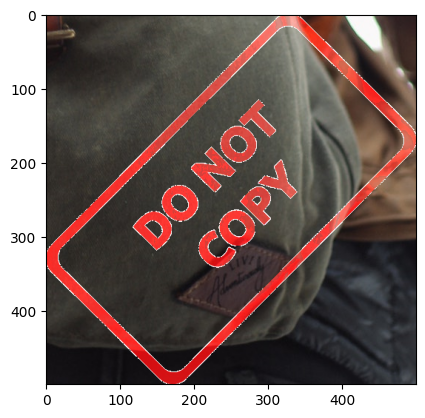

In [119]:
final_roi = cv2.bitwise_or(image1_roi, fg)
plt.imshow(final_roi)

In [120]:
## Now we will simply do overlaying of the final_roi with the original image i.e. image1

In [121]:
final_roi.shape

(500, 500, 3)

In [122]:
image1.shape

(1401, 934, 3)

In [123]:
# x_offset = 934-500
# y_offset = 1401-500

# x_end = image1.shape[1]
# y_end = image1.shape[0]

In [124]:
image1[y_offset:y_end, x_offset:x_end] = final_roi

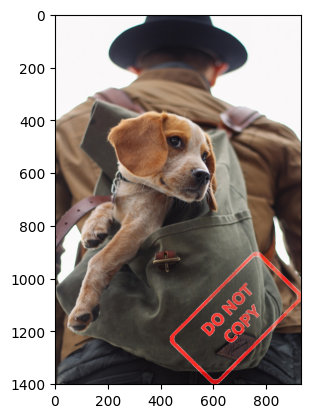

In [125]:
plt.imshow(image1)

In [126]:
###practice code for blending

In [189]:
image1 = cv2.imread('invoice.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread('conf.jpeg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

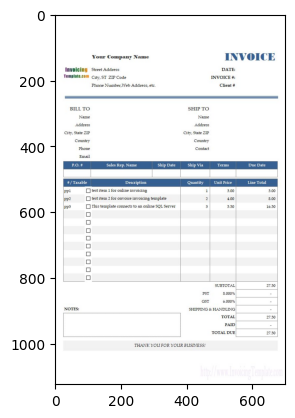

In [190]:
plt.imshow(image1)

In [191]:
image2 = cv2.resize(image2, dsize = (200,200))

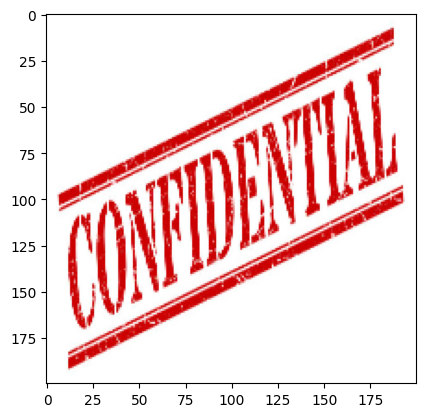

In [192]:
plt.imshow(image2)

In [195]:
# image2_threshold = cv2.threshold(image2, thresh=70,maxval=255,type=cv2.THRESH_BINARY)

In [196]:
# plt.imshow(image2_threshold[1])

In [197]:
image1 = image1

In [181]:
# image2 = image2_threshold[1]

In [158]:
# image2

In [198]:
image2_gray = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

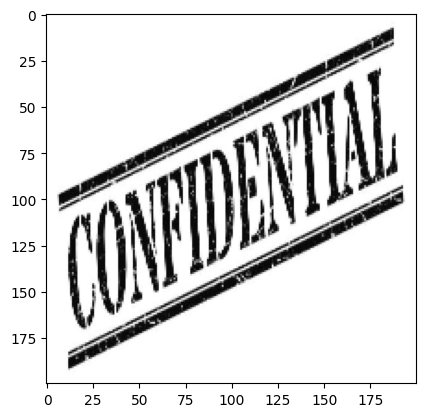

In [199]:
plt.imshow(image2_gray, cmap='gray')

In [200]:
mask_image2 = cv2.bitwise_not(image2_gray)

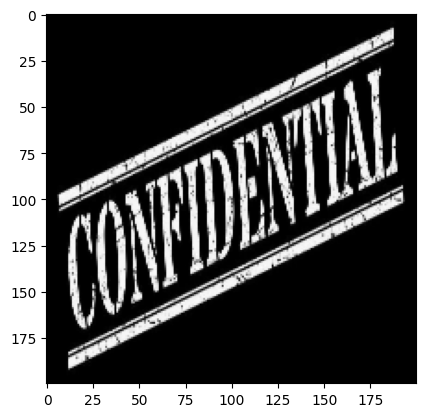

In [201]:
plt.imshow(mask_image2, cmap='gray')

In [202]:
mask_image2.shape

(200, 200)

In [226]:
# fg = cv2.bitwise_or(image2, image2, mask=mask_image2)
fg = cv2.bitwise_or(image2, image2, mask=mask_image2)

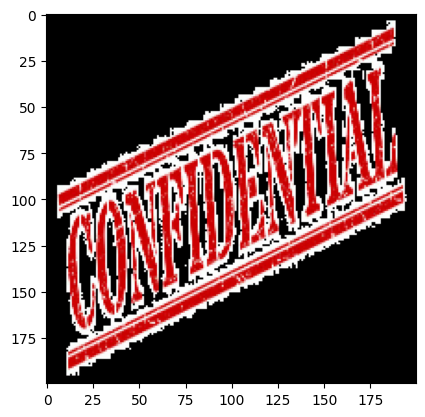

In [227]:
plt.imshow(fg)

In [205]:
#### Get the ROI from the original image 

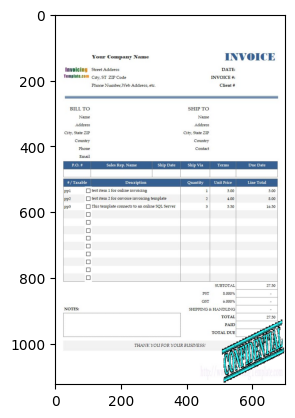

In [228]:
plt.imshow(image1)

In [229]:
x_offset = image1.shape[1] - image2.shape[1]
y_offset = image1.shape[0] - image2.shape[0]

x_end = image1.shape[1]
y_end = image1.shape[0]

In [208]:
(x_offset,x_end)

(500, 700)

In [209]:
y_offset,y_end

(924, 1124)

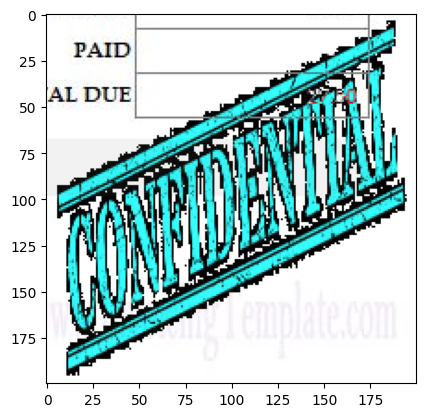

In [230]:
plt.imshow(image1[y_offset:y_end,x_offset:x_end])

In [231]:
roi=image1[y_offset:y_end,x_offset:x_end]

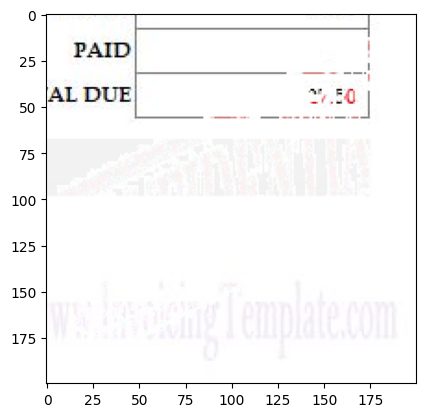

In [232]:
plt.imshow(cv2.bitwise_or(roi,fg))

In [216]:
final_roi = cv2.bitwise_xor(roi,fg)

In [217]:
image1[y_offset:y_end,x_offset:x_end] = final_roi

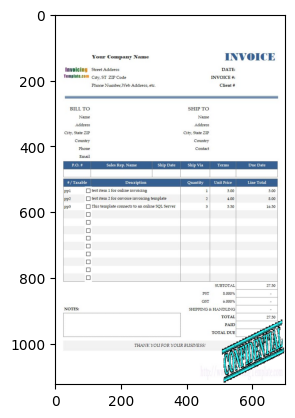

In [219]:
plt.imshow(image1)